### Import necessary libraries

In [1]:
# import necessary libraries
from skimage.external import tifffile
from scipy.ndimage import label
from matplotlib import pyplot as plt
from scipy.spatial import cKDTree
from math import pi
import pandas as pd
import scipy.ndimage as ndi
import glob
import h5py
import os
import numpy as np
import time

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

#おまじない
plt.style.use('ggplot') 
font = {'family' : 'meiryo'}
matplotlib.rc('font', **font)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['meiryo'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


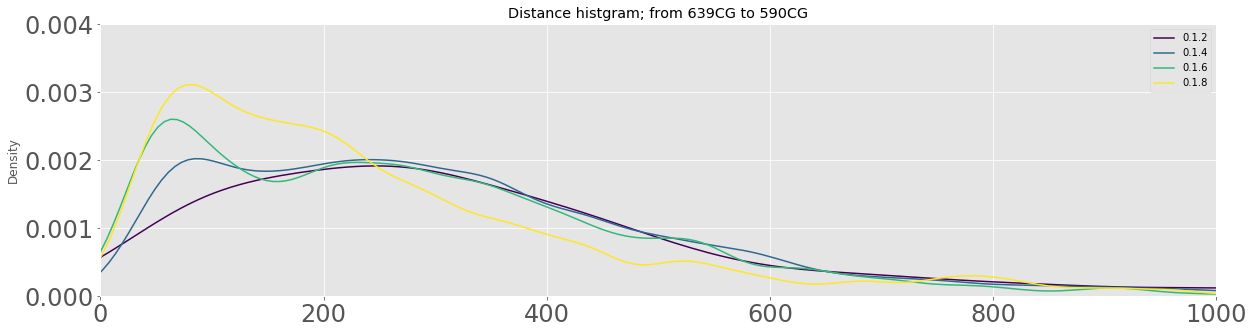

In [8]:
#change directory
os.chdir("/Users/shimpei.i.kubota/Dropbox/PythonCode/191100_analysis/191105_0303A549time")
#make dataframe 
df = pd.read_csv('191115_0303A549_dose_f590CG_t639CG_04.csv')

#列を指定
dfg = df.iloc[:,[20,42,64,86]]
#make graph by "pandas plot"
dfg.plot(kind='density', bw_method=0.1,figsize=(20, 5),
         title='Distance histgram; from 639CG to 590CG',
         grid=True,
         xticks=[0, 200, 400, 600, 800, 1000], xlim=[0,1000],
         yticks=[0, 0.001, 0.002, 0.003, 0.004], ylim=[0, 0.004],
         fontsize=24, colormap="viridis")

plt.savefig('191209_0303_A549_dose_f590CG_t639CG_cdistdensity04.png')
plt.savefig('191209_0303_A549_dose_f590CG_t639CG_cdistdensity04.pdf')
plt.savefig('191209_0303_A549_dose_f590CG_t639CG_cdistdensity04.eps')

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dabest

#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob

print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v0.2.7


      G0C-3_639    G0C-3_590    G0C-1_639     G0C-1_590     G0C0_639  \
0  1.011007e+08  199541553.8  479888268.8  2.331848e+08  171288129.4   
1  1.150896e+08  270356501.3  178861443.8  9.082873e+07   52389067.5   
2  6.913857e+07  168703796.3  227494822.5  7.921999e+07  148097874.4   

      G0C0_590     G0C1_639      G0C1_590  
0  271120162.5  61338605.63  1.468952e+08  
1  103033693.1   8321321.25  1.088775e+08  
2  108402463.1  40102425.00  9.119626e+07  


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be in

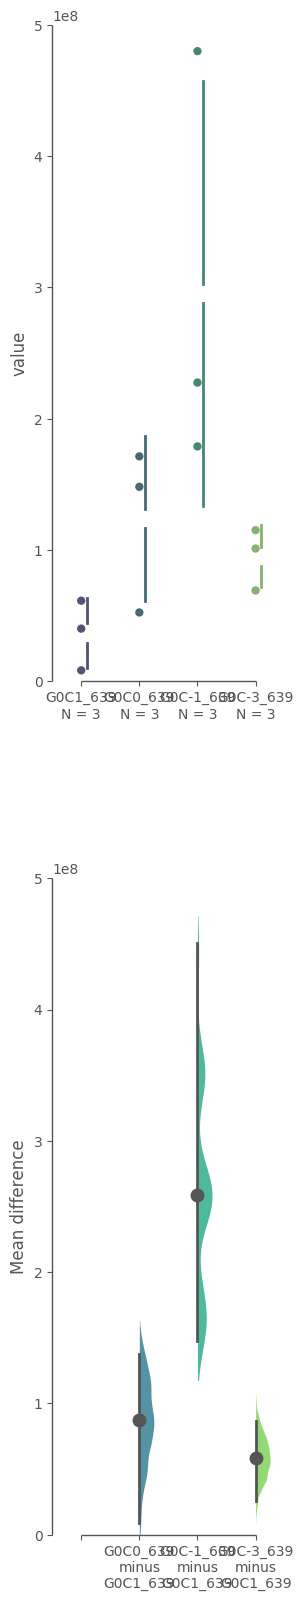

In [34]:
# Load the csv dataset
A549 = pd.read_csv("/Users/shimpei.i.kubota/Dropbox/PythonCode/191000_analysis/180303_A549_time_csv/180303_time.csv")

df_A549 = A549.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7]]

print (df_A549)


# Load the above data into 'dabest'
A549_dabest = dabest.load(df_A549, idx=("G0C1_639", "G0C0_639", "G0C-1_639", "G0C-3_639"), ci=95)
A549_dabest.mean_diff.plot(fig_size=(3, 20), custom_palette="viridis", 
                           swarm_ylim=(0, 500000000), contrast_ylim=(0, 500000000))

plt.savefig("191115_A549_time_Vol_01.png")
plt.savefig("191115_A549_time_Vol_01.pdf")
plt.savefig("191115_A549_time_Vol_01.eps")

      G0C-3_639    G0C-3_590    G0C-1_639     G0C-1_590     G0C0_639  \
0  1.011007e+08  199541553.8  479888268.8  2.331848e+08  171288129.4   
1  1.150896e+08  270356501.3  178861443.8  9.082873e+07   52389067.5   
2  6.913857e+07  168703796.3  227494822.5  7.921999e+07  148097874.4   

      G0C0_590     G0C1_639      G0C1_590  
0  271120162.5  61338605.63  1.468952e+08  
1  103033693.1   8321321.25  1.088775e+08  
2  108402463.1  40102425.00  9.119626e+07  


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be in

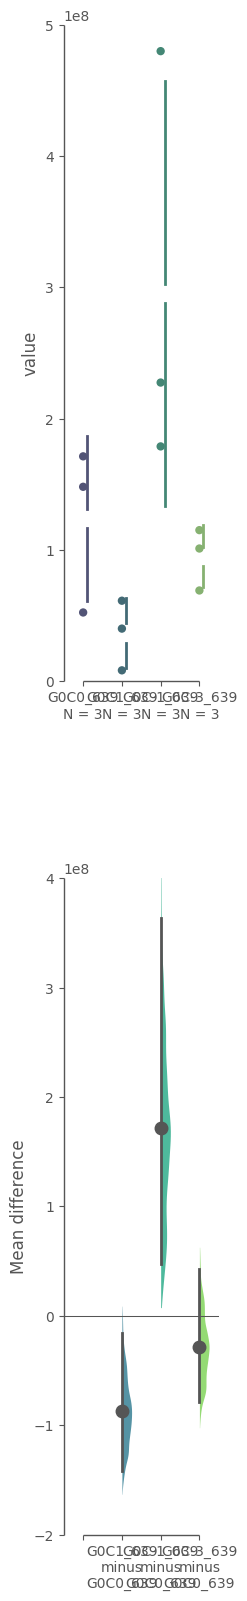

In [35]:
# Load the csv dataset
A549 = pd.read_csv("/Users/shimpei.i.kubota/Dropbox/PythonCode/191000_analysis/180303_A549_time_csv/180303_time.csv")

df_A549 = A549.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7]]

print (df_A549)


# Load the above data into 'dabest'
A549_dabest = dabest.load(df_A549, idx=("G0C0_639", "G0C1_639", "G0C-1_639", "G0C-3_639"), ci=95)
A549_dabest.mean_diff.plot(fig_size=(2, 20), custom_palette="viridis", 
                           swarm_ylim=(0, 500000000), contrast_ylim=(-200000000, 400000000))

plt.savefig("191115_A549_time_Vol_02.png")
plt.savefig("191115_A549_time_Vol_02.pdf")
plt.savefig("191115_A549_time_Vol_02.eps")

   G0C-3_639.1  G0C-3_590.1  G0C-1_639.1  G0C-1_590.1  G0C0_639.1  G0C0_590.1  \
0          530         1701         2270         2912         873        2387   
1          625         1688          953         1440         293        2003   
2          485         2388         1444         1767         661        1744   

   G0C1_639.1  G0C1_590.1  
0         410        3801  
1          76        3254  
2         220        3794  


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be in

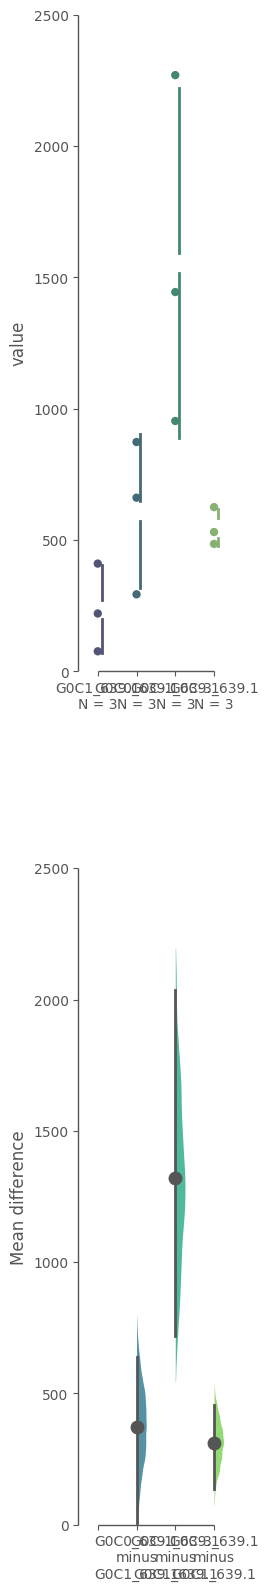

In [36]:
# Load the csv dataset
A549 = pd.read_csv("/Users/shimpei.i.kubota/Dropbox/PythonCode/191000_analysis/180303_A549_time_csv/180303_time.csv")

df_A549 = A549.iloc[:,[8, 9, 10, 11, 12, 13, 14, 15]]

print (df_A549)


# Load the above data into 'dabest'
A549_dabest = dabest.load(df_A549, idx=("G0C1_639.1", "G0C0_639.1", "G0C-1_639.1", "G0C-3_639.1"), ci=95)
A549_dabest.mean_diff.plot(fig_size=(2, 20), custom_palette="viridis", 
                           swarm_ylim=(0, 2500), contrast_ylim=(0, 2500))

plt.savefig("191115_A549_time_Num_03.png")
plt.savefig("191115_A549_time_Num_03.pdf")
plt.savefig("191115_A549_time_Num_03.eps")



   G0C-3_639.1  G0C-3_590.1  G0C-1_639.1  G0C-1_590.1  G0C0_639.1  G0C0_590.1  \
0          530         1701         2270         2912         873        2387   
1          625         1688          953         1440         293        2003   
2          485         2388         1444         1767         661        1744   

   G0C1_639.1  G0C1_590.1  
0         410        3801  
1          76        3254  
2         220        3794  


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.c

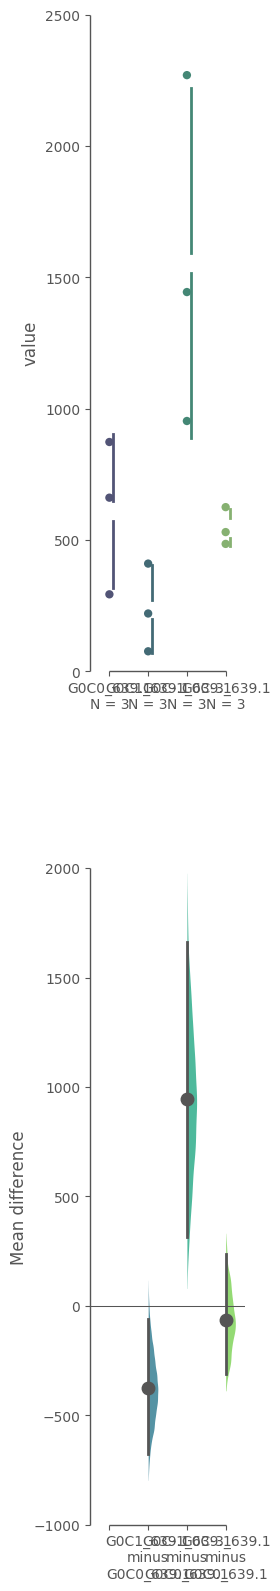

In [37]:
# Load the csv dataset
A549 = pd.read_csv("/Users/shimpei.i.kubota/Dropbox/PythonCode/191000_analysis/180303_A549_time_csv/180303_time.csv")


df_A549 = A549.iloc[:,[8, 9, 10, 11, 12, 13, 14, 15]]

print (df_A549)


# Load the above data into 'dabest'
A549_dabest = dabest.load(df_A549, idx=("G0C0_639.1", "G0C1_639.1", "G0C-1_639.1", "G0C-3_639.1"), ci=95)
A549_dabest.mean_diff.plot(fig_size=(2, 20), custom_palette="viridis", 
                           swarm_ylim=(0, 2500), contrast_ylim=(-1000, 2000))

plt.savefig("191115_A549_time_Num_04.png")
plt.savefig("191115_A549_time_Num_04.pdf")
plt.savefig("191115_A549_time_Num_04.eps")




### Fig4C

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dabest

#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob

print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v0.2.7


In [39]:
# Load the csv dataset
A549 = pd.read_csv("/Users/shimpei.i.kubota/Dropbox/PythonCode/191100_analysis/191105_0303A549time/191108_0303A549_col_02.csv")

df_A549 = A549.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7]]

print (df_A549)

   C-3G0_590  C-3G0_639  C-1G0_590  C-1G0_639  C0G0_590   C0G0_639  C1G0_590  \
0   2.292769   6.037736   6.765110   8.766520  4.817763  11.683849  1.236517   
1   2.784360   8.960000   5.694444   8.919203  1.248128   7.849829  0.338045   
2   1.591290   8.659794   4.753820   5.263158  6.594037  17.246596  1.001581   

    C1G0_639  
0  10.487805  
1  17.105263  
2  15.315315  


   C-3G0_639  C-1G0_639   C0G0_639   C1G0_639
0   6.037736   8.766520  11.683849  10.487805
1   8.960000   8.919203   7.849829  17.105263
2   8.659794   5.263158  17.246596  15.315315


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be in

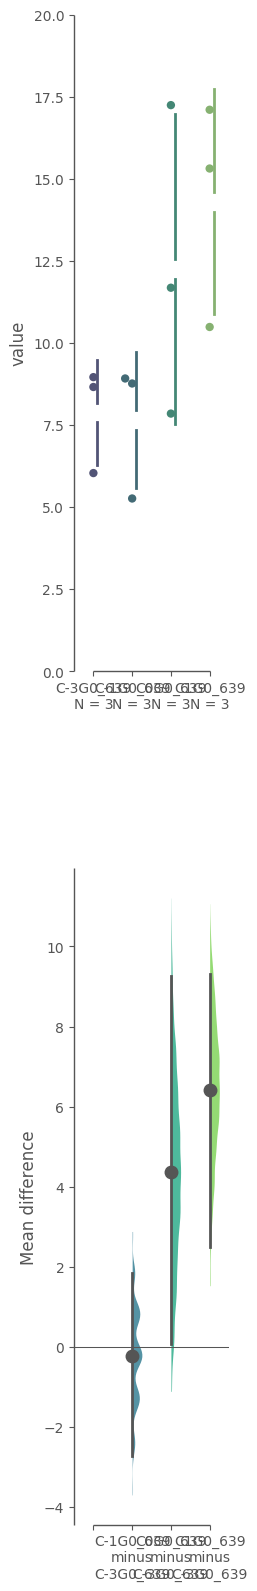

In [42]:
# Load the csv dataset
A549 = pd.read_csv("/Users/shimpei.i.kubota/Dropbox/PythonCode/191100_analysis/191105_0303A549time/191108_0303A549_col_02.csv")

df_A549 = A549.iloc[:,[1, 3, 5, 7]]

print (df_A549)

# Load the above data into 'dabest'
A549_dabest = dabest.load(df_A549, idx=("C-3G0_639", "C-1G0_639",
                                        "C0G0_639", "C1G0_639"), ci=95)
A549_dabest.mean_diff.plot(fig_size=(2, 20), custom_palette="viridis",
                           swarm_ylim=(0, 20))

plt.savefig("191115_0303A549_time_col_04.png")
plt.savefig("191115_0303A549_time_col_04.pdf")
plt.savefig("191115_0303A549_time_col_04.eps")

   C-3G0_639  C-1G0_639   C0G0_639   C1G0_639
0   6.037736   8.766520  11.683849  10.487805
1   8.960000   8.919203   7.849829  17.105263
2   8.659794   5.263158  17.246596  15.315315


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be in

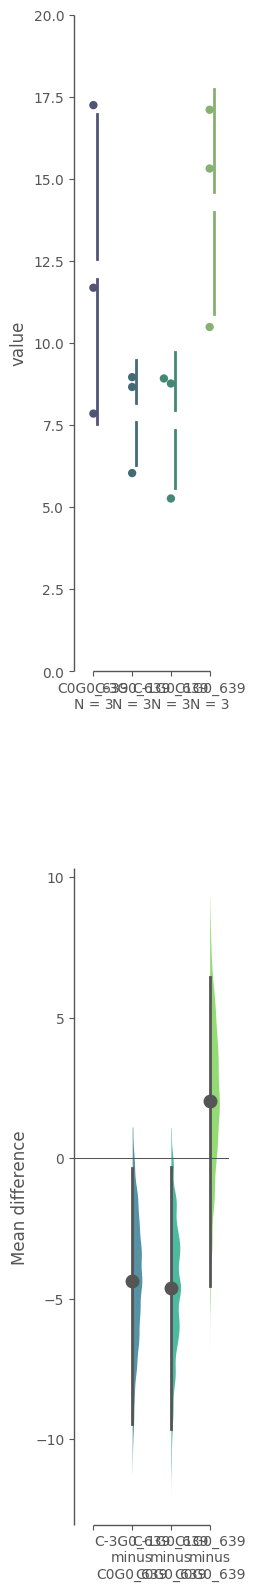

In [43]:
# Load the csv dataset
A549 = pd.read_csv("/Users/shimpei.i.kubota/Dropbox/PythonCode/191100_analysis/191105_0303A549time/191108_0303A549_col_02.csv")

df_A549 = A549.iloc[:,[1, 3, 5, 7]]

print (df_A549)

# Load the above data into 'dabest'
A549_dabest = dabest.load(df_A549, idx=("C0G0_639", "C-3G0_639",
                                        "C-1G0_639", "C1G0_639"), ci=95)
A549_dabest.mean_diff.plot(fig_size=(2, 20), custom_palette="viridis",
                           swarm_ylim=(0, 20))

plt.savefig("191115_0303A549_time_col_03.png")
plt.savefig("191115_0303A549_time_col_03.pdf")
plt.savefig("191115_0303A549_time_col_03.eps")